## Math part

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats


height = np.array([ 1.83,  1.83,  1.73,  1.82,  1.83, 1.73, 1.99,  1.85,  1.68,  1.87,
                    1.66,  1.71,  1.73,  1.64,  1.70, 1.60, 1.79,  1.73,  1.62,  1.77])
grp = np.array(["M"] * 10 + ["F"] * 10)
df = pd.DataFrame()
df = df.assign(height = height, gender = grp)
df.head()
male =  df['height'].where(df['gender'] == 'M').dropna().tolist()
female = df['height'].where(df['gender'] == 'F').dropna().tolist()


# Means/std-dev per groups
mean_male = np.mean(male)
mean_female = np.mean(female)
print(f'Male mean: {mean_male:.4f}')
print(f'Female mean: {mean_female:.4f}\n')

std_male = np.std(male, ddof=1)
std_female = np.std(female, ddof=1)
print(f'Male std: {std_male:.4f}')
print(f'Female std: {std_female:.4f}\n')


# t-value (standard two sample t-test with equal variances)
var_male = np.var(male, ddof=1)
var_female = np.var(female, ddof=1)

n_male = len(male)
n_female = len(female)

t_value = (mean_male - mean_female) / np.sqrt((var_male/n_male) + (var_female/n_female))
print(f't-value: {t_value}\n')


# p-value
dof = n_male + n_female - 2
p_value = 1 - stats.t.cdf(t_value, dof)
print(f'p-value: {p_value}\n')


# two-sided p-value
p_value2 = p_value * 2
print(f'two sided p-value: {p_value2}\n')


# Compare the two-sided p-values
scipy_ttest = stats.ttest_ind(male, female)
print(f'scipy_ttest: t_value={scipy_ttest[0]}, p_value={scipy_ttest[1]}')
assert np.allclose(scipy_ttest, (t_value, p_value2))

Male mean: 1.8160
Female mean: 1.6950

Male std: 0.0871
Female std: 0.0635

t-value: 3.5511519888466885

p-value: 0.0011410446855635303

two sided p-value: 0.0022820893711270607

scipy_ttest: t_value=3.5511519888466885, p_value=0.00228208937112721


## Application part

Smoker mean:
2771.9189189189187

Non-smoker mean:
3055.695652173913

Smoker std:
655.1627146099261

Non-smoker std:
749.3770418492027

t-test: t_value=-2.6528933032136495, p_value=0.008666726371019062



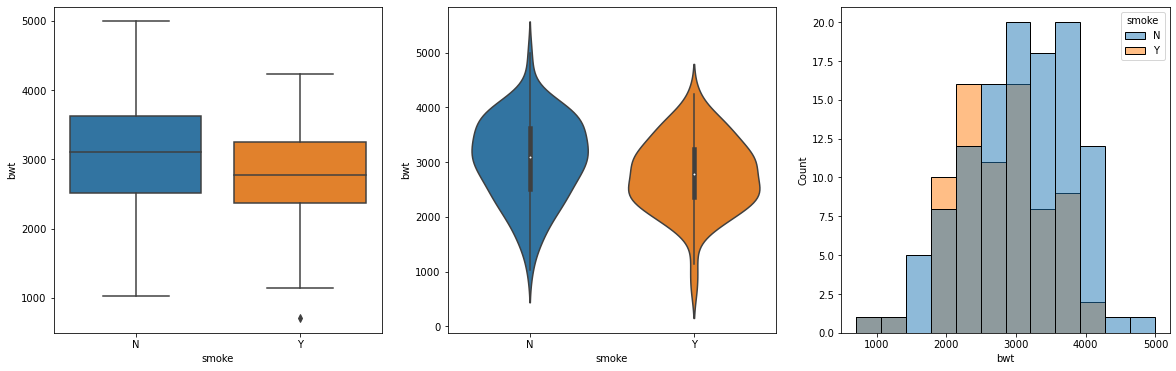

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Explore the data
url = 'https://github.com/duchesnay/pystatsml/raw/master/datasets/birthwt.csv'
df = pd.read_csv(url)
df.head()


# Recode smoke factor
df['smoke'] = df['smoke'].replace({0: 'N', 1:'Y'})
smoker = df['bwt'].where(df['smoke'] == 'Y').dropna()
nonsmoker = df['bwt'].where(df['smoke'] == 'N').dropna()


# Means/std-dev per groups
mean_smoker = np.mean(smoker)
mean_nonsmoker = np.mean(nonsmoker)
print(f'Smoker mean:\n{mean_smoker}\n')
print(f'Non-smoker mean:\n{mean_nonsmoker}\n')

std_smoker = np.std(smoker)
std_nonsmoker = np.std(nonsmoker)
print(f'Smoker std:\n{std_smoker}\n')
print(f'Non-smoker std:\n{std_nonsmoker}\n')


# Plot birth weight by smoking
f, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(data=df, x='smoke', y='bwt', ax=axes[0])
sns.violinplot(data=df, x='smoke', y='bwt', ax=axes[1])
sns.histplot(data=df, x='bwt', hue='smoke', ax=axes[2])


# Test the effect of smoking on birth weight
t_test = stats.ttest_ind(smoker, nonsmoker)
print(f't-test: t_value={t_test[0]}, p_value={t_test[1]}\n')